In [1]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split


from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow import keras

In [2]:
model_inc = keras.applications.InceptionV3(include_top=False)

In [3]:
model_inc.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalizati

In [22]:
little_blue = [cv2.resize(cv2.imread("little blue/" + i), (299, 299)) for i in os.listdir("little blue")]
emperor = [cv2.resize(cv2.imread("emperor/" + i), (299, 299)) for i in os.listdir("emperor")]
tupik = [cv2.resize(cv2.imread("tupik/" + i), (299, 299)) for i in os.listdir("tupik")] 

In [23]:
images = np.array(little_blue + emperor + tupik)

In [24]:
y = np.array( [0] * 30 + [1] * 30 + [2] * 30)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(image_1, y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((72, 299, 299, 3), (18, 299, 299, 3), (72,), (18,))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

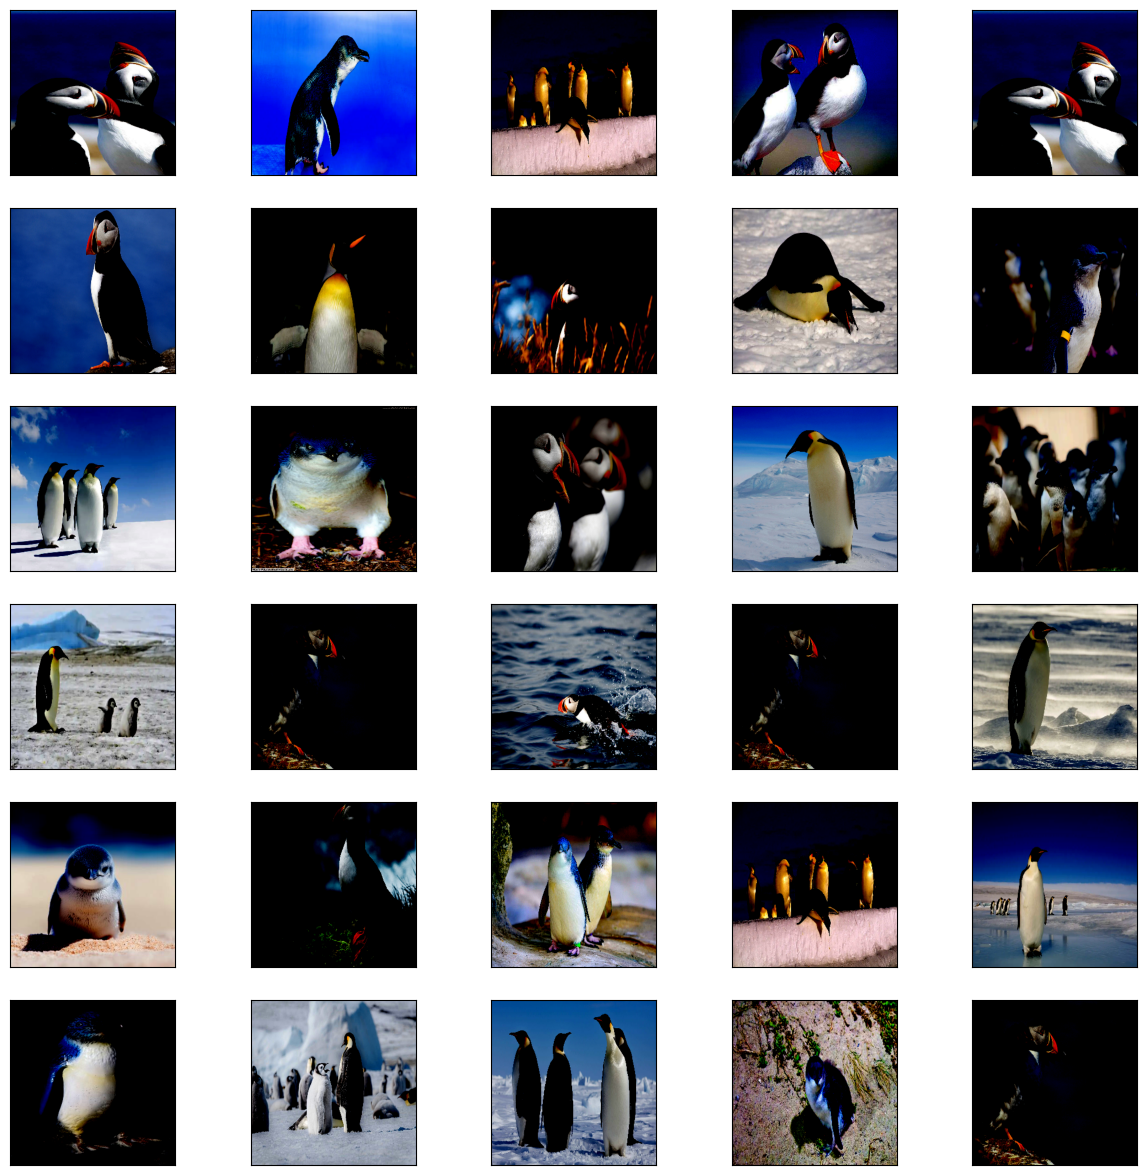

In [44]:
plt.figure(figsize=(15,15))
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[random.randint(0, len(x_train)-1)][:,:,::-1])

In [32]:
image_1 = []
for i in images:
    image_1.append(keras.applications.inception_v3.preprocess_input(i))

In [33]:
image_1 = np.array(image_1)

In [34]:
image_1.shape

(90, 299, 299, 3)

In [35]:
y.shape

(90,)

In [36]:
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat =  keras.utils.to_categorical(y_test)

In [37]:
for layer in model_inc.layers:
    layer.trainable = False

In [38]:
input_layer = Input(shape=(299,299,3))
x = model_inc(input_layer)
x2 = GlobalAveragePooling2D()(x)
x3 = Dense(3, activation="softmax")(x2)

In [39]:
model = keras.models.Model(inputs = input_layer, outputs=x3)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 21808931 (83.19 MB)
Trainable params: 6147 (24.01 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [48]:
model_fit = model.fit(x_train, y_train_cat, epochs=10, validation_data=(x_test, y_test_cat), batch_size=20)

Epoch 1/10
4/4 [==============================] - 5s 1s/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.2318 - val_accuracy: 0.8889
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.2289 - val_accuracy: 0.8889
Epoch 3/10
4/4 [==============================] - 5s 1s/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.2252 - val_accuracy: 0.8889
Epoch 4/10
4/4 [==============================] - 5s 1s/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.2254 - val_accuracy: 0.8889
Epoch 5/10
4/4 [==============================] - 5s 1s/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.2242 - val_accuracy: 0.8889
Epoch 6/10
4/4 [==============================] - 5s 1s/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.2229 - val_accuracy: 0.8889
Epoch 7/10
4/4 [==============================] - 5s 1s/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.2226 - val_accuracy: 0.8889
Epoch 8/10
4/4 [=========================

In [51]:
pred_test = model.predict(x_test).argmax(axis=1)

1/1 [==============================] - 1s 1s/step


In [52]:
tr = pred_test == y_test
tr

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [54]:
tr_f = x_test[~tr]
tr_f.shape

(2, 299, 299, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


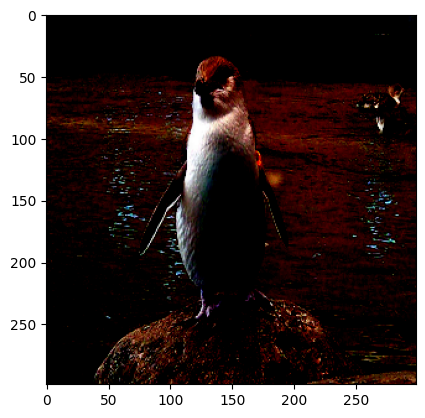

In [56]:
plt.imshow(tr_f[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


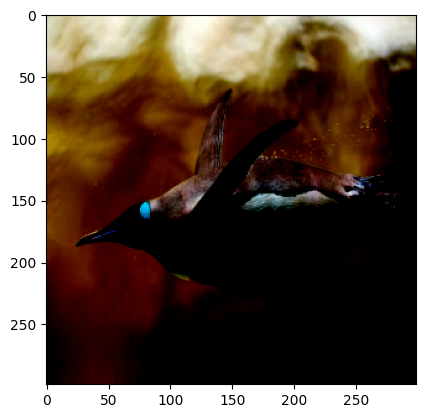

In [57]:
plt.imshow(tr_f[1])

In [58]:
pred_test, y_test

(array([2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 0], dtype=int64),
 array([2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


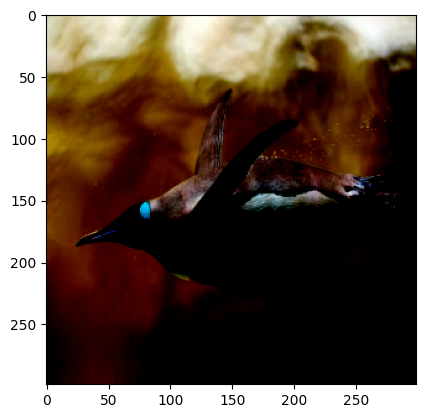

In [59]:
plt.imshow(x_test[-10])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


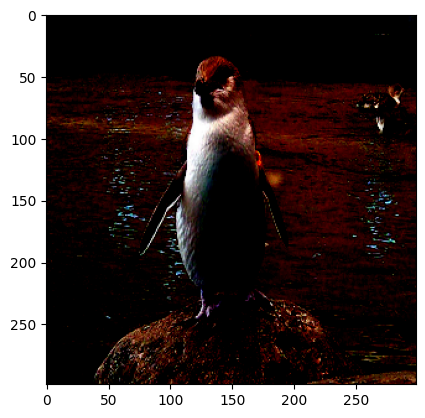

In [62]:
plt.imshow(x_test[6])